# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from config import openweather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = [] 
lat_list = [] 
Lng_list = [] 
Temp_list = [] 
Wind_list = []
i=1

# Build query URL and request your results in Celsius
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for city in cities:
    print(f'Processing Record {i}| {city}')
    query_url = f"{url}appid={openweather_key}&q={city}&units={units}"
    i = i +1
    # Get weather data
    weather_json = requests.get(query_url).json()
    try:
        city_list.append(weather_json['name'])
        cloudiness_list.append(weather_json['clouds']['all'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        humidity_list.append(weather_json['main']['humidity'])
        lat_list.append(weather_json['coord']['lat'])
        Lng_list.append(weather_json['coord']['lon'])
        Temp_list.append(weather_json['main']['temp_max'])
        Wind_list.append(weather_json['wind']['speed'])
        time.sleep(1)
    # Handle exceptions for a city thats not found
    except:
        # Append null values
        print(f"{city} not found. Skipping...")
        pass    
    
#query_url = f"{url}appid={openweather_key}&q=halifax&units={units}"
#weather_json = requests.get(query_url).json()
#print(json.dumps(weather_json, indent=4, sort_keys=True)) 

Beginning Data Retrieval
-----------------------------
Processing Record 1| yellowknife
Processing Record 2| mpongwe
Processing Record 3| barrow
Processing Record 4| bluff
Processing Record 5| bossangoa
Processing Record 6| east london
Processing Record 7| busselton
Processing Record 8| new norfolk
Processing Record 9| hay river
Processing Record 10| vaini
Processing Record 11| benguela
Processing Record 12| arlit
Processing Record 13| bredasdorp
Processing Record 14| cabo san lucas
Processing Record 15| saskylakh
Processing Record 16| hunza
hunza not found. Skipping...
Processing Record 17| nikolskoye
Processing Record 18| port lincoln
Processing Record 19| jamestown
Processing Record 20| bethel
Processing Record 21| clyde river
Processing Record 22| ozgon
ozgon not found. Skipping...
Processing Record 23| khormuj
khormuj not found. Skipping...
Processing Record 24| dubasari
Processing Record 25| castro
Processing Record 26| esperance
Processing Record 27| hobart
Processing Record 28|

Processing Record 235| ambagarh chauki
Processing Record 236| arawa
Processing Record 237| basco
Processing Record 238| palmer
Processing Record 239| nisia floresta
Processing Record 240| talnakh
Processing Record 241| biltine
Processing Record 242| tiksi
Processing Record 243| praia da vitoria
Processing Record 244| christchurch
Processing Record 245| znamenskoye
Processing Record 246| airai
Processing Record 247| acapulco
Processing Record 248| sao geraldo do araguaia
Processing Record 249| saint-augustin
Processing Record 250| olbernhau
Processing Record 251| itaituba
Processing Record 252| comodoro rivadavia
Processing Record 253| otelu rosu
Processing Record 254| dudinka
Processing Record 255| campoverde
Processing Record 256| nemuro
Processing Record 257| saleaula
saleaula not found. Skipping...
Processing Record 258| marawi
Processing Record 259| bolungarvik
bolungarvik not found. Skipping...
Processing Record 260| kismayo
Processing Record 261| tabou
Processing Record 262| bode

Processing Record 464| sorvag
sorvag not found. Skipping...
Processing Record 465| pudozh
Processing Record 466| chupa
Processing Record 467| poum
Processing Record 468| khash
Processing Record 469| doha
Processing Record 470| meulaboh
Processing Record 471| ilulissat
Processing Record 472| henderson
Processing Record 473| nome
Processing Record 474| igra
Processing Record 475| brigham city
Processing Record 476| le port
Processing Record 477| flin flon
Processing Record 478| rincon
Processing Record 479| balimo
balimo not found. Skipping...
Processing Record 480| chagda
chagda not found. Skipping...
Processing Record 481| yuzhno-kurilsk
Processing Record 482| aykhal
Processing Record 483| sindor
Processing Record 484| beyneu
Processing Record 485| maku
Processing Record 486| poronaysk
Processing Record 487| sao felix do xingu
Processing Record 488| oskemen
Processing Record 489| oakville
Processing Record 490| barcelos
Processing Record 491| kurikka
Processing Record 492| cayenne
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dict = {
    "city" : city_list,
    "cloudiness":cloudiness_list,
    "country":country_list,
    "date" :date_list,
    "humidity":humidity_list,
    "lat":lat_list,
    "Lng":Lng_list,
    "Temp":Temp_list,
    "Wind":Wind_list
}

city_df = pd.DataFrame(city_dict)
city_df.to_csv("cities.csv", encoding="utf-8", index=False) 

In [20]:
today_date = date.today().strftime("%m/%d/%y")

'01/18/20'

In [5]:
city_df 

,city,cloudiness,country,date,humidity,lat,Lng,Temp,Wind
0,Yellowknife,5,CA,1579350882,73,62.46,-114.35,-34.01,4.70
1,Mpongwe,100,ZM,1579350884,90,-13.51,28.16,74.88,5.91
2,Barrow,1,US,1579350885,77,71.29,-156.79,5.00,3.36
3,Bluff,96,NZ,1579350886,84,-46.60,168.33,63.00,8.01
4,Bossangoa,27,CF,1579350887,11,6.49,17.46,97.97,7.56
...,...,...,...,...,...,...,...,...,...
531,Digby,97,CA,1579351466,92,44.62,-65.77,14.47,23.49
532,Brownsville,1,US,1579351257,88,25.90,-97.50,72.00,10.29
533,Bandarbeyla,44,SO,1579351468,75,9.49,50.81,77.14,24.79
534,Williams Lake,100,CA,1579351469,95,52.14,-122.14,3.07,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

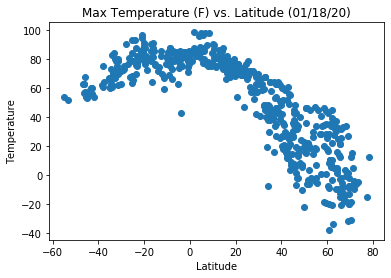

In [22]:
#Plot Temperature (F) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['Temp'])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title(f'Max Temperature (F) vs. Latitude ({today_date})')
plt.savefig(f"Images/Temperature Vs Latitude")
plt.show()

#### Latitude vs. Humidity Plot

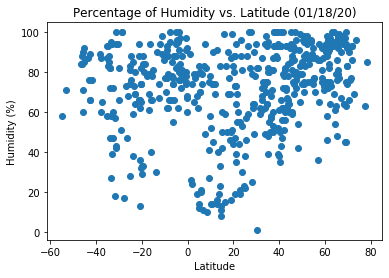

In [23]:
#Plot Humidity (%) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Percentage of Humidity vs. Latitude ({today_date})')
plt.savefig(f"Images/Humidity Vs Latitude")
plt.show()

#### Latitude vs. Cloudiness Plot

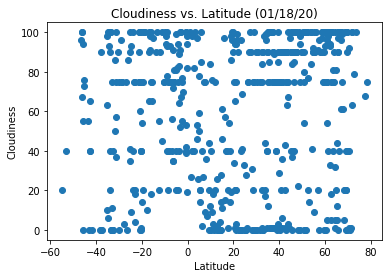

In [24]:
#Plot Cloudiness (%) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'Cloudiness vs. Latitude ({today_date})')
plt.savefig(f"Images/Cloudiness Vs Latitude")
plt.show()

#### Latitude vs. Wind Speed Plot

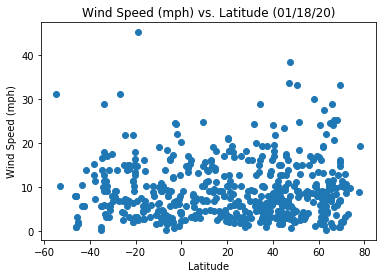

In [25]:
#Plot Wind Speed (mph) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['Wind'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Wind Speed (mph) vs. Latitude ({today_date})')
plt.savefig(f"Images/Wind Speed Vs Latitude")
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plotter(yaxis, xaxis):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(yaxis, xaxis)
    regress_values = yaxis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(yaxis, xaxis)
    plt.plot(yaxis,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [11]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere_cities = city_df.loc[city_df['lat'] >= 0]
south_hemisphere_cities = city_df.loc[city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

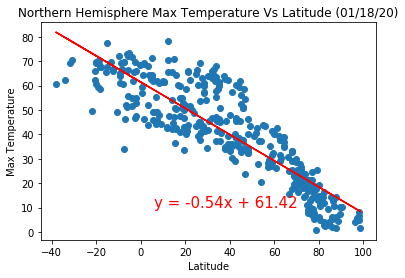

In [32]:
#Northern Hemisphere - Temperature (F) vs. Latitude
yaxis = north_hemisphere_cities['Temp']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Northern Hemisphere Max Temperature Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Max Temperature Vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

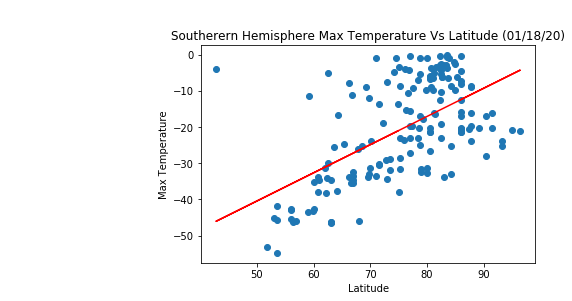

In [33]:
#Southern Hemisphere - Temperature (F) vs. Latitude
yaxis = south_hemisphere_cities['Temp']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Southerern Hemisphere Max Temperature Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Max Temperature Vs Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

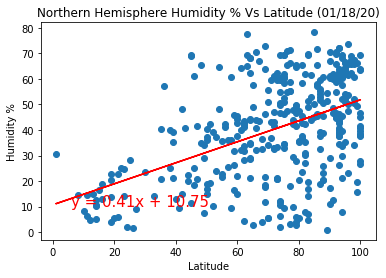

In [26]:
#Northern Hemisphere - Humidity (%)  vs. Latitude
yaxis = north_hemisphere_cities['humidity']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Northern Hemisphere Humidity % Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Humidity % Vs Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

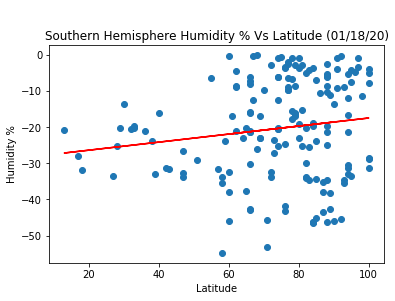

In [27]:
#Southern Hemisphere - Humidity (%)  vs. Latitude
yaxis = south_hemisphere_cities['humidity']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Southern Hemisphere Humidity % Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Humidity % Vs Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

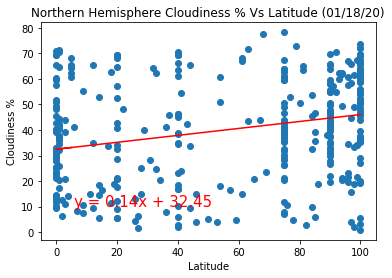

In [28]:
#Northern Hemisphere - Cloudiness (%)   vs. Latitude
yaxis = north_hemisphere_cities['cloudiness']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Northern Hemisphere Cloudiness % Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Cloudiness % Vs Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

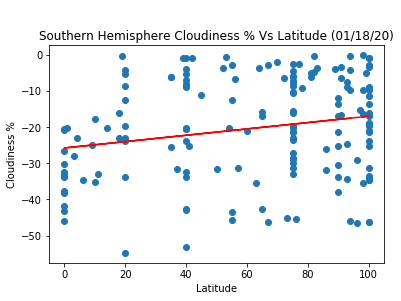

In [29]:
#Southern Hemisphere - Cloudiness (%)   vs. Latitude
yaxis = south_hemisphere_cities['cloudiness']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'Southern Hemisphere Cloudiness % Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Cloudiness % Vs Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

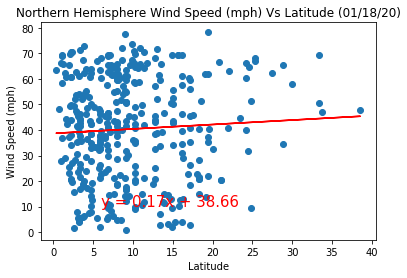

In [30]:
#Northern Hemisphere - Wind Speed (mph)   vs. Latitude
yaxis = north_hemisphere_cities['Wind']
xaxis = north_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Wind Speed (mph) Vs Latitude ({today_date})')
plt.savefig(f"Images/Northern Hemisphere Wind Speed % Vs Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

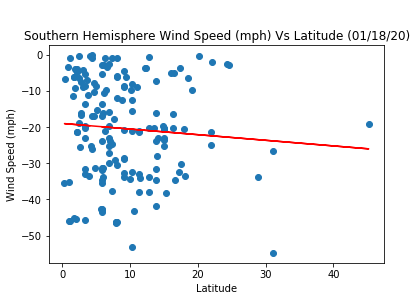

In [31]:
#Southern Hemisphere - Wind Speed (mph)   vs. Latitude
yaxis = south_hemisphere_cities['Wind']
xaxis = south_hemisphere_cities['lat']
linear_regression_plotter(yaxis, xaxis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Wind Speed (mph) Vs Latitude ({today_date})')
plt.savefig(f"Images/Southern Hemisphere Wind Speed % Vs Latitude")
plt.show()